In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c pubg-finish-placement-prediction

401 - Unauthorized


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!ls

kaggle.json  sample_submission_V2.csv.zip  train_V2.csv.zip
sample_data  test_V2.csv.zip


In [ ]:
!unzip train_V2.csv.zip

Archive:  train_V2.csv.zip
  inflating: train_V2.csv            


In [ ]:
df=pd.read_csv('train_V2.csv')

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
df['winPlacePerc'].fillna(value=0,inplace=True
                          )

In [ ]:
df.shape

(4446966, 29)

In [ ]:
df['assists'].unique()

array([ 0,  1,  3,  2,  4,  6,  5,  8,  9,  7, 13, 11, 12, 21, 10, 20, 14,
       17, 22, 15])

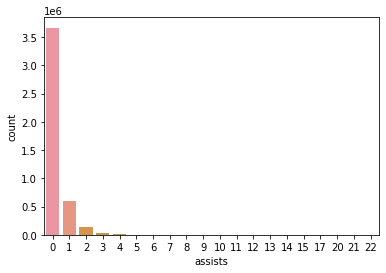

In [ ]:
sn.countplot(df['assists'])

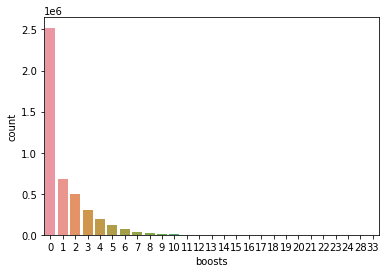

In [ ]:
sn.countplot(df['boosts'])

In [ ]:
df.groupby(by='boosts',).mean()['assists']

boosts
0     0.105619
1     0.244658
2     0.342346
3     0.465512
4     0.566871
5     0.660616
6     0.739385
7     0.794451
8     0.832689
9     0.850081
10    0.865481
11    0.834550
12    0.836088
13    0.796610
14    0.817460
15    0.838710
16    0.766667
17    0.937500
18    0.615385
19    1.833333
20    1.333333
21    0.500000
22    0.000000
23    2.000000
24    0.000000
28    0.000000
33    0.000000
Name: assists, dtype: float64

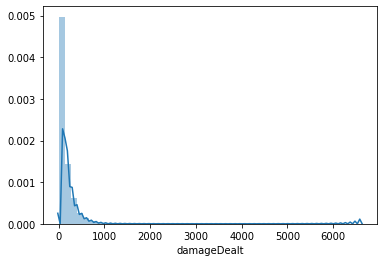

In [ ]:
sn.distplot(df['damageDealt'])

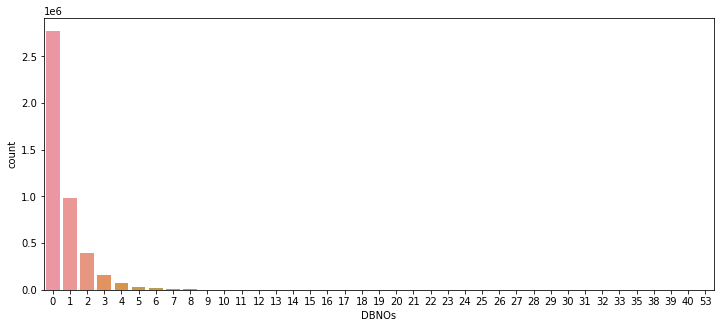

In [ ]:
plt.figure(figsize=(12,5))
sn.countplot(df['DBNOs'])

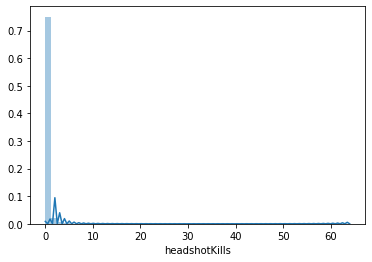

In [ ]:
sn.distplot(df['headshotKills'])

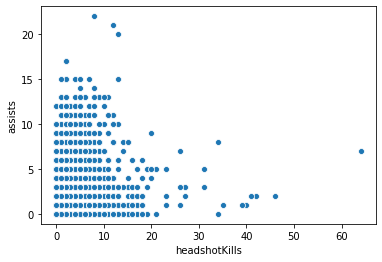

In [ ]:
sn.scatterplot(df['headshotKills'],df['assists'])

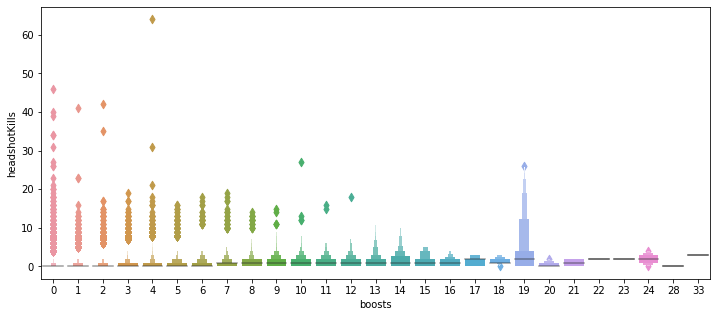

In [ ]:
plt.figure(figsize=(12,5))
sn.boxenplot(df['boosts'],df['headshotKills'])

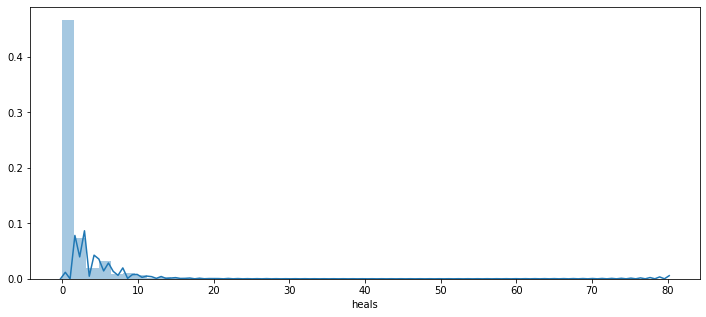

In [ ]:
plt.figure(figsize=(12,5))
sn.distplot(df['heals'])

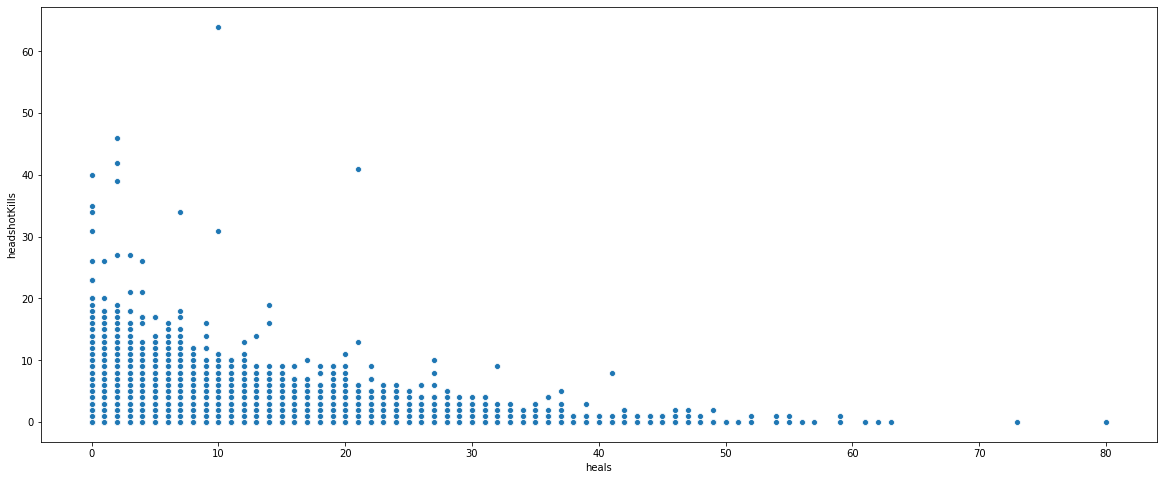

In [ ]:
plt.figure(figsize=(20,8))
sn.scatterplot(df['heals'],df['headshotKills'])

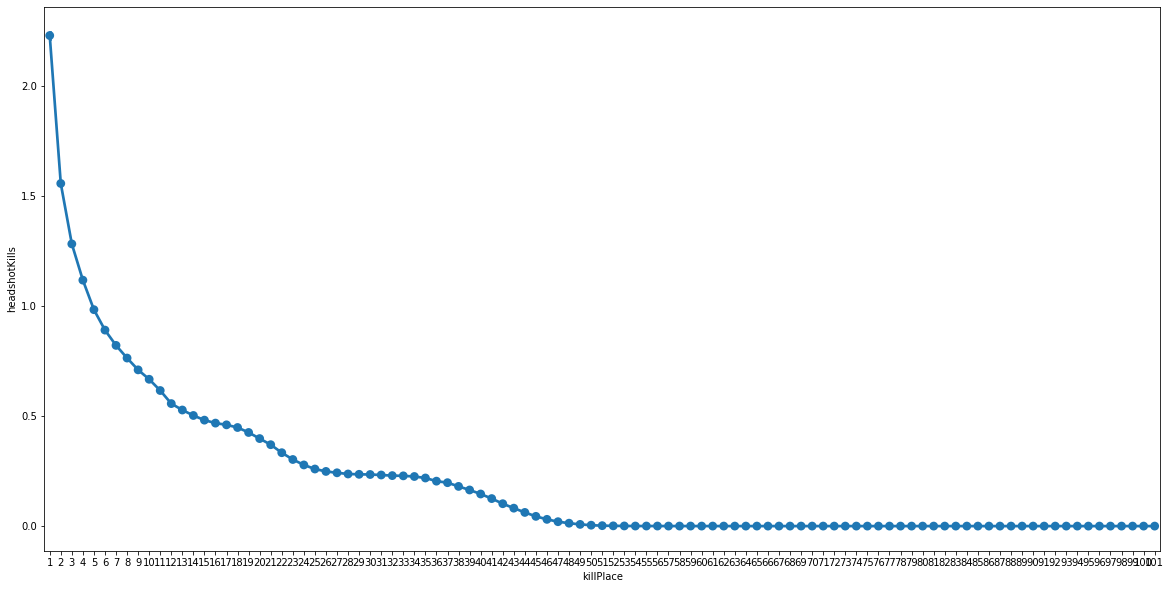

In [ ]:
plt.figure(figsize=(20,10))
sn.pointplot(df['killPlace'],df['headshotKills'])

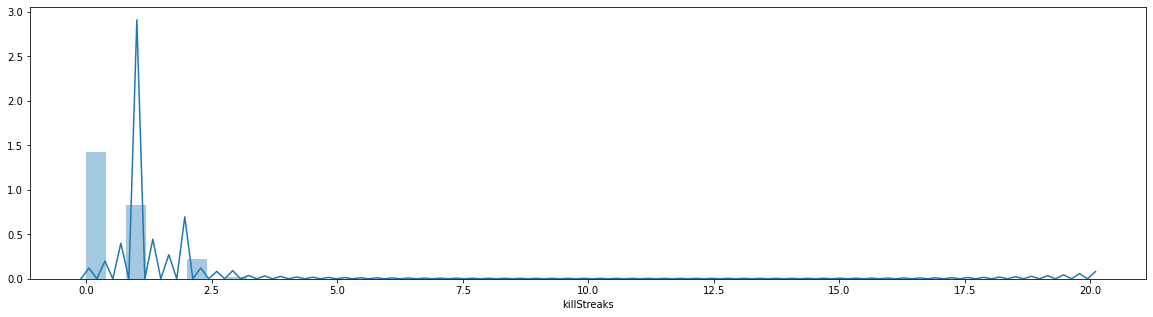

In [ ]:
plt.figure(figsize=(20,5))
sn.distplot(df['killStreaks'])

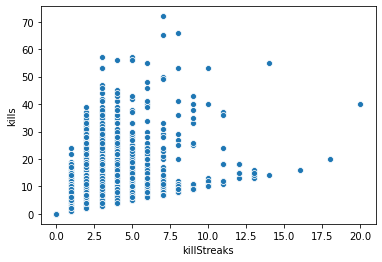

In [ ]:
sn.scatterplot(df['killStreaks'],df['kills'])

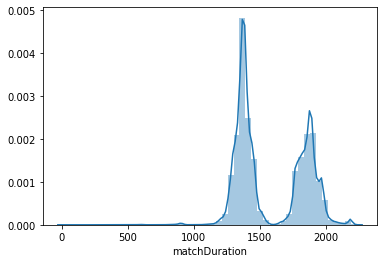

In [ ]:
sn.distplot(df['matchDuration'])

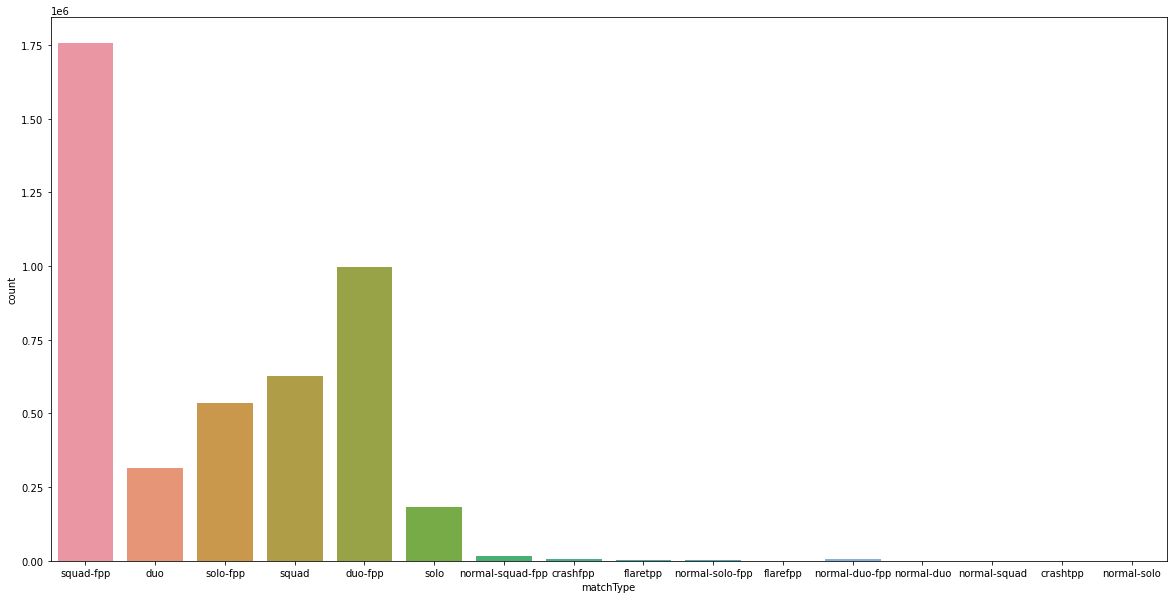

In [ ]:
plt.figure(figsize=(20,10))
sn.countplot(df['matchType'])

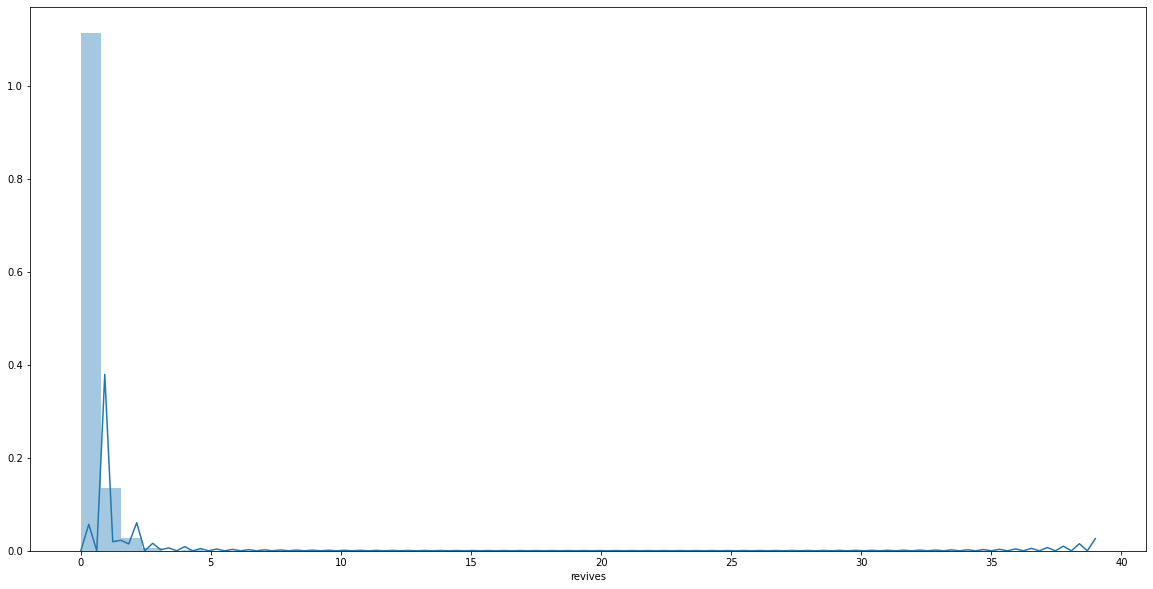

In [ ]:
plt.figure(figsize=(20,10))
sn.distplot(df['revives'])

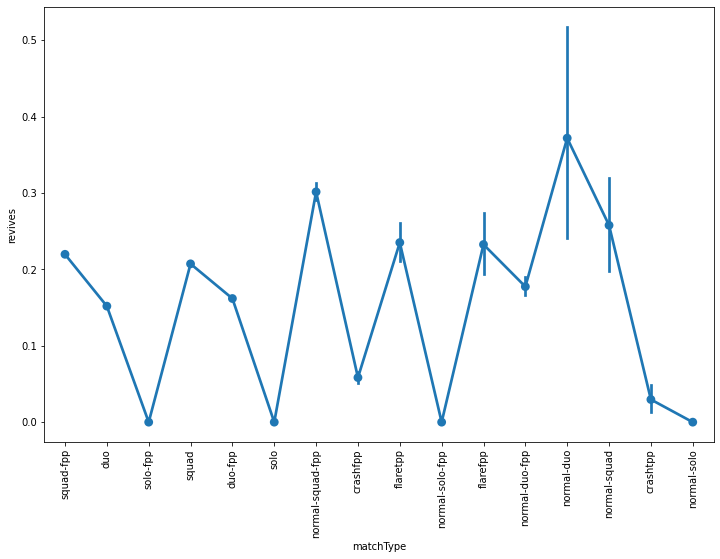

In [ ]:
plt.figure(figsize=(12,8))
sn.pointplot(df['matchType'],df['revives'])
plt.xticks(rotation=90)
plt.show()

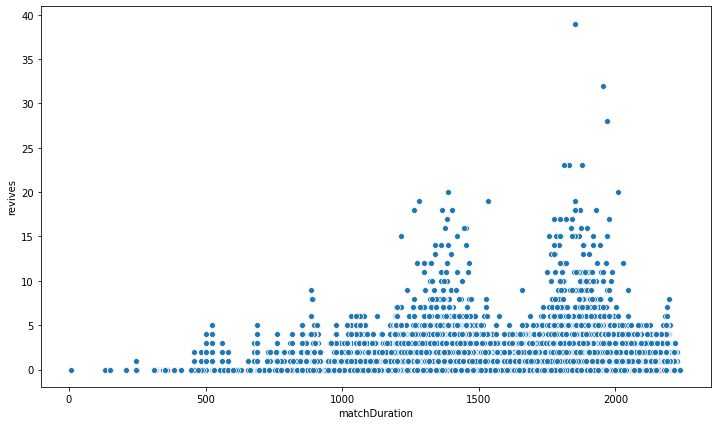

In [ ]:
plt.figure(figsize=(12,7))
sn.scatterplot(df['matchDuration'],df['revives'])

In [ ]:
df['matchDuration'].describe()

count    4.446966e+06
mean     1.579506e+03
std      2.587399e+02
min      9.000000e+00
25%      1.367000e+03
50%      1.438000e+03
75%      1.851000e+03
max      2.237000e+03
Name: matchDuration, dtype: float64

<Figure size 1080x504 with 0 Axes>

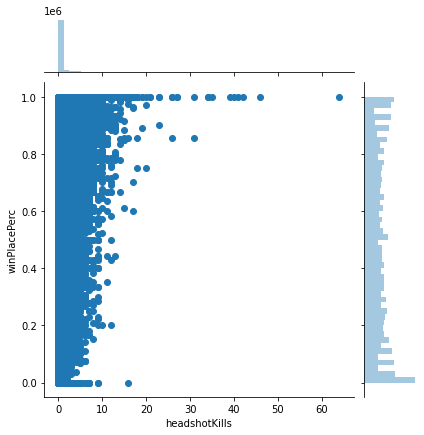

In [ ]:
plt.figure(figsize=(15,7))
sn.jointplot(x='headshotKills',y='winPlacePerc',data=df)

<Figure size 1080x504 with 0 Axes>

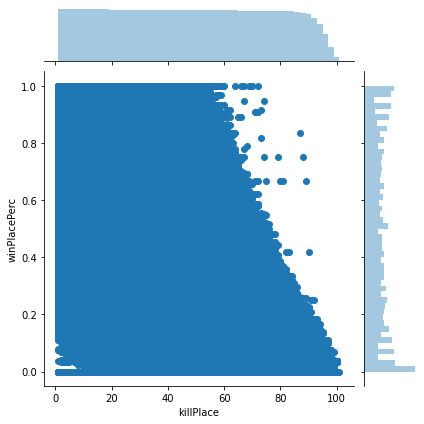

In [ ]:
plt.figure(figsize=(15,7))
sn.jointplot(x='killPlace',y='winPlacePerc',data=df)

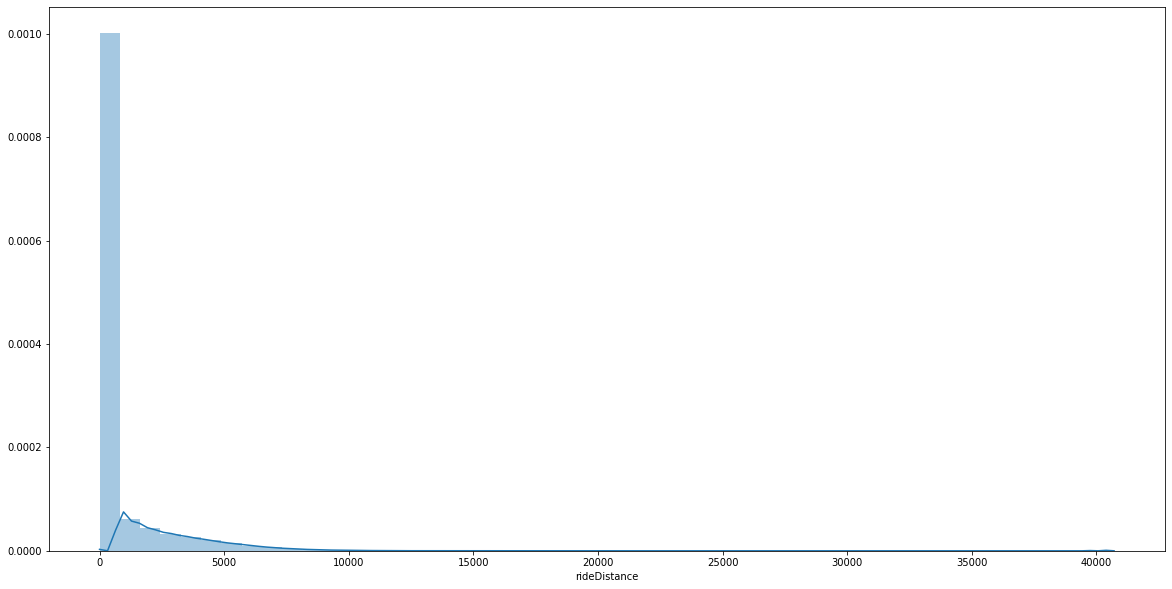

In [ ]:
plt.figure(figsize=(20,10))
sn.distplot(df['rideDistance'])

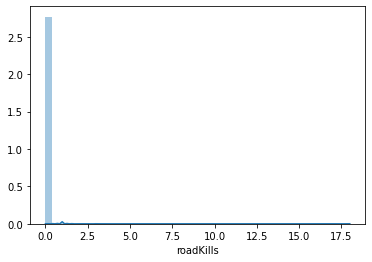

In [ ]:
sn.distplot(df['roadKills'])

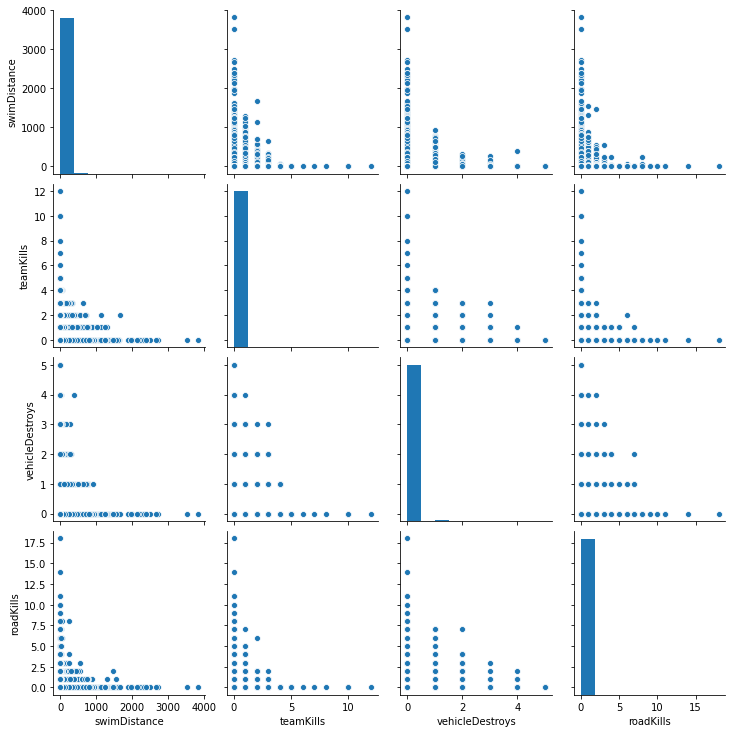

In [ ]:
sn.pairplot(df[['swimDistance','teamKills','vehicleDestroys','roadKills']])

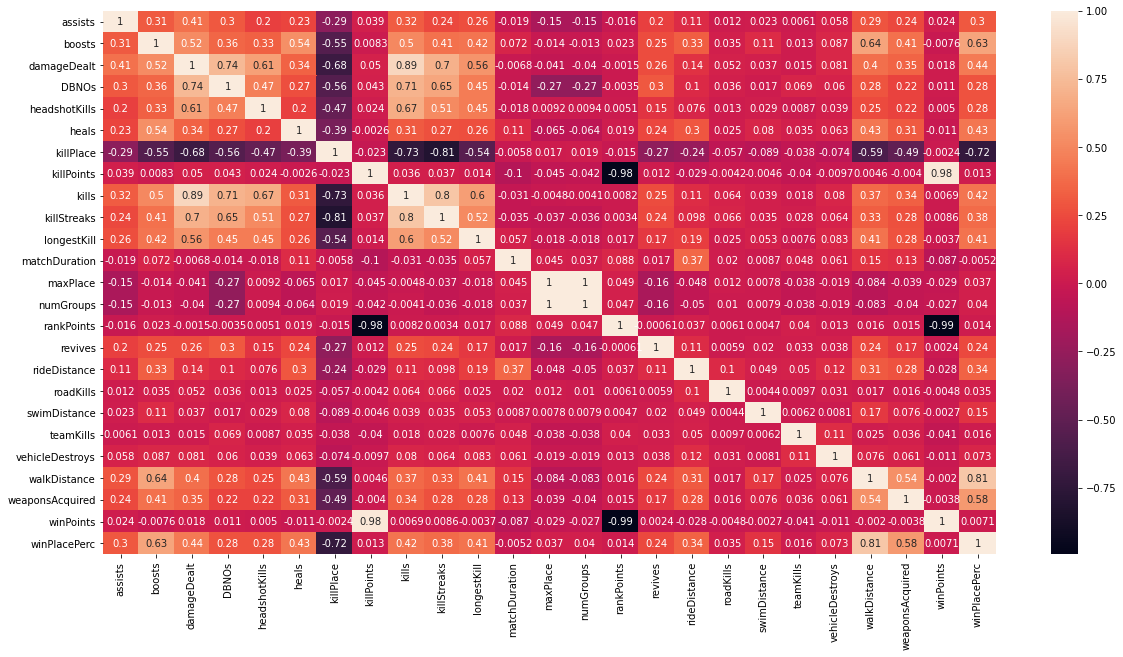

In [ ]:
plt.figure(figsize=(20,10))
sn.heatmap(df.corr(),annot=True)

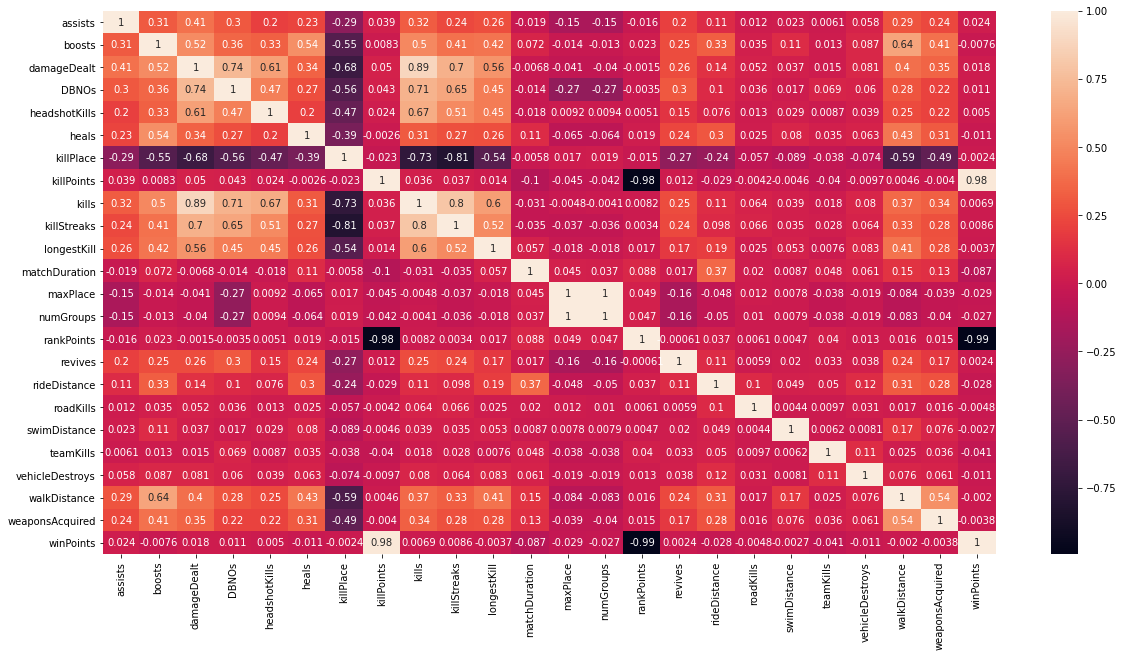

In [ ]:
data=df.drop('winPlacePerc',axis=1).copy()
plt.figure(figsize=(20,10))
sn.heatmap(data.corr(),annot=True)